In [1]:
from manim import *

config.media_width = "100%"

Manim Community v0.9.0

In [2]:
# define coordinate range here
# change max_x to control the whole coordinate system
max_x = 100
min_x = -max_x
min_y, max_y = min_x // 2, max_x // 2
axis_step = max_x / 10
x_step = axis_step / 4

x_range = (min_x, max_x, axis_step)
y_range = (min_y, max_y, axis_step)

In [3]:
# define functions you want to display here

def primeCount(x: float) -> float:
    if x == 1:
        raise ZeroDivisionError("undefined")
    return x / np.log(x)

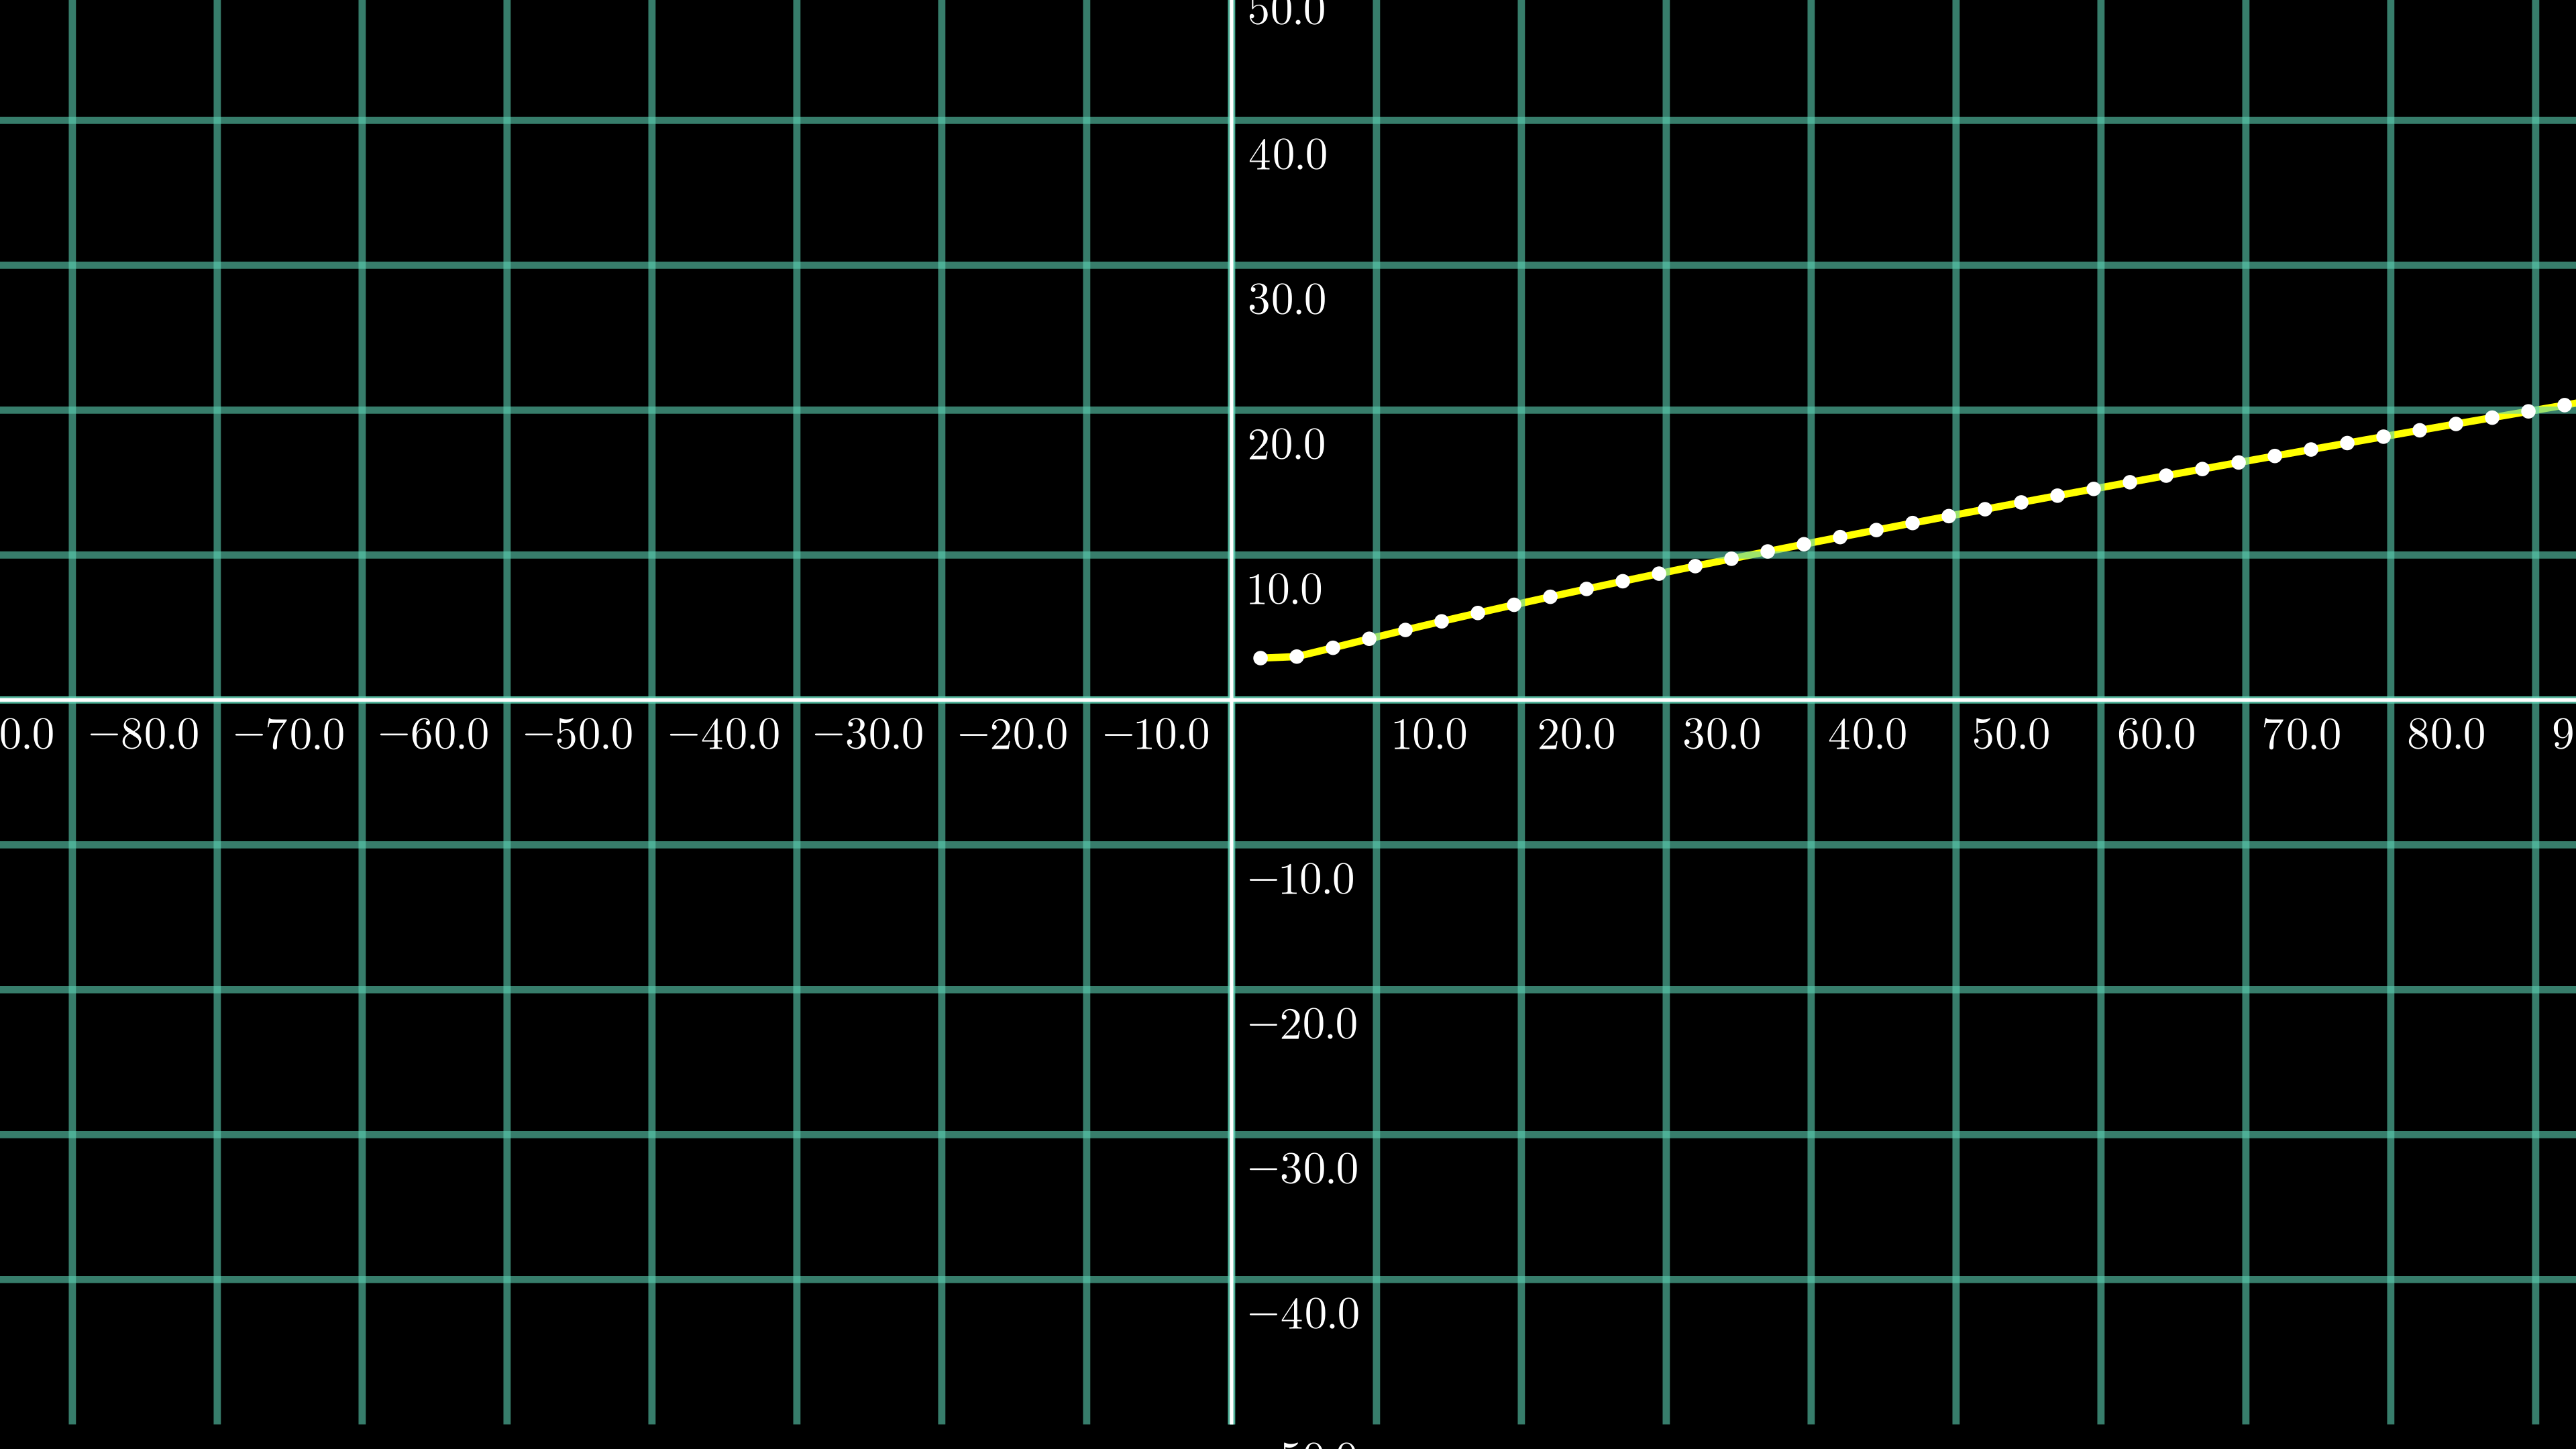

In [4]:
%%manim -v WARNING -qk NormalPlane

class NormalPlane(Scene):
    def construct(self):
        plane = NumberPlane(
            # when value range is too large, disable this
            axis_config = {"include_numbers": True},
            x_length = 16,
            y_length = 8,
            x_range = x_range,
            y_range = y_range,
            background_line_style = {
                "stroke_color": TEAL,
                "stroke_width": 4,
                "stroke_opacity": 0.6,
            },
        ).center()

        x_vals = [x for x in np.arange(2, max_x, x_step)]
        y_vals = [primeCount(x) for x in x_vals]
        function_graph = plane.get_line_graph(
            x_values = x_vals,
            y_values = y_vals,
            vertex_dot_radius = 0.04,
            stroke_width = 4,
        )

        self.add(plane, function_graph)

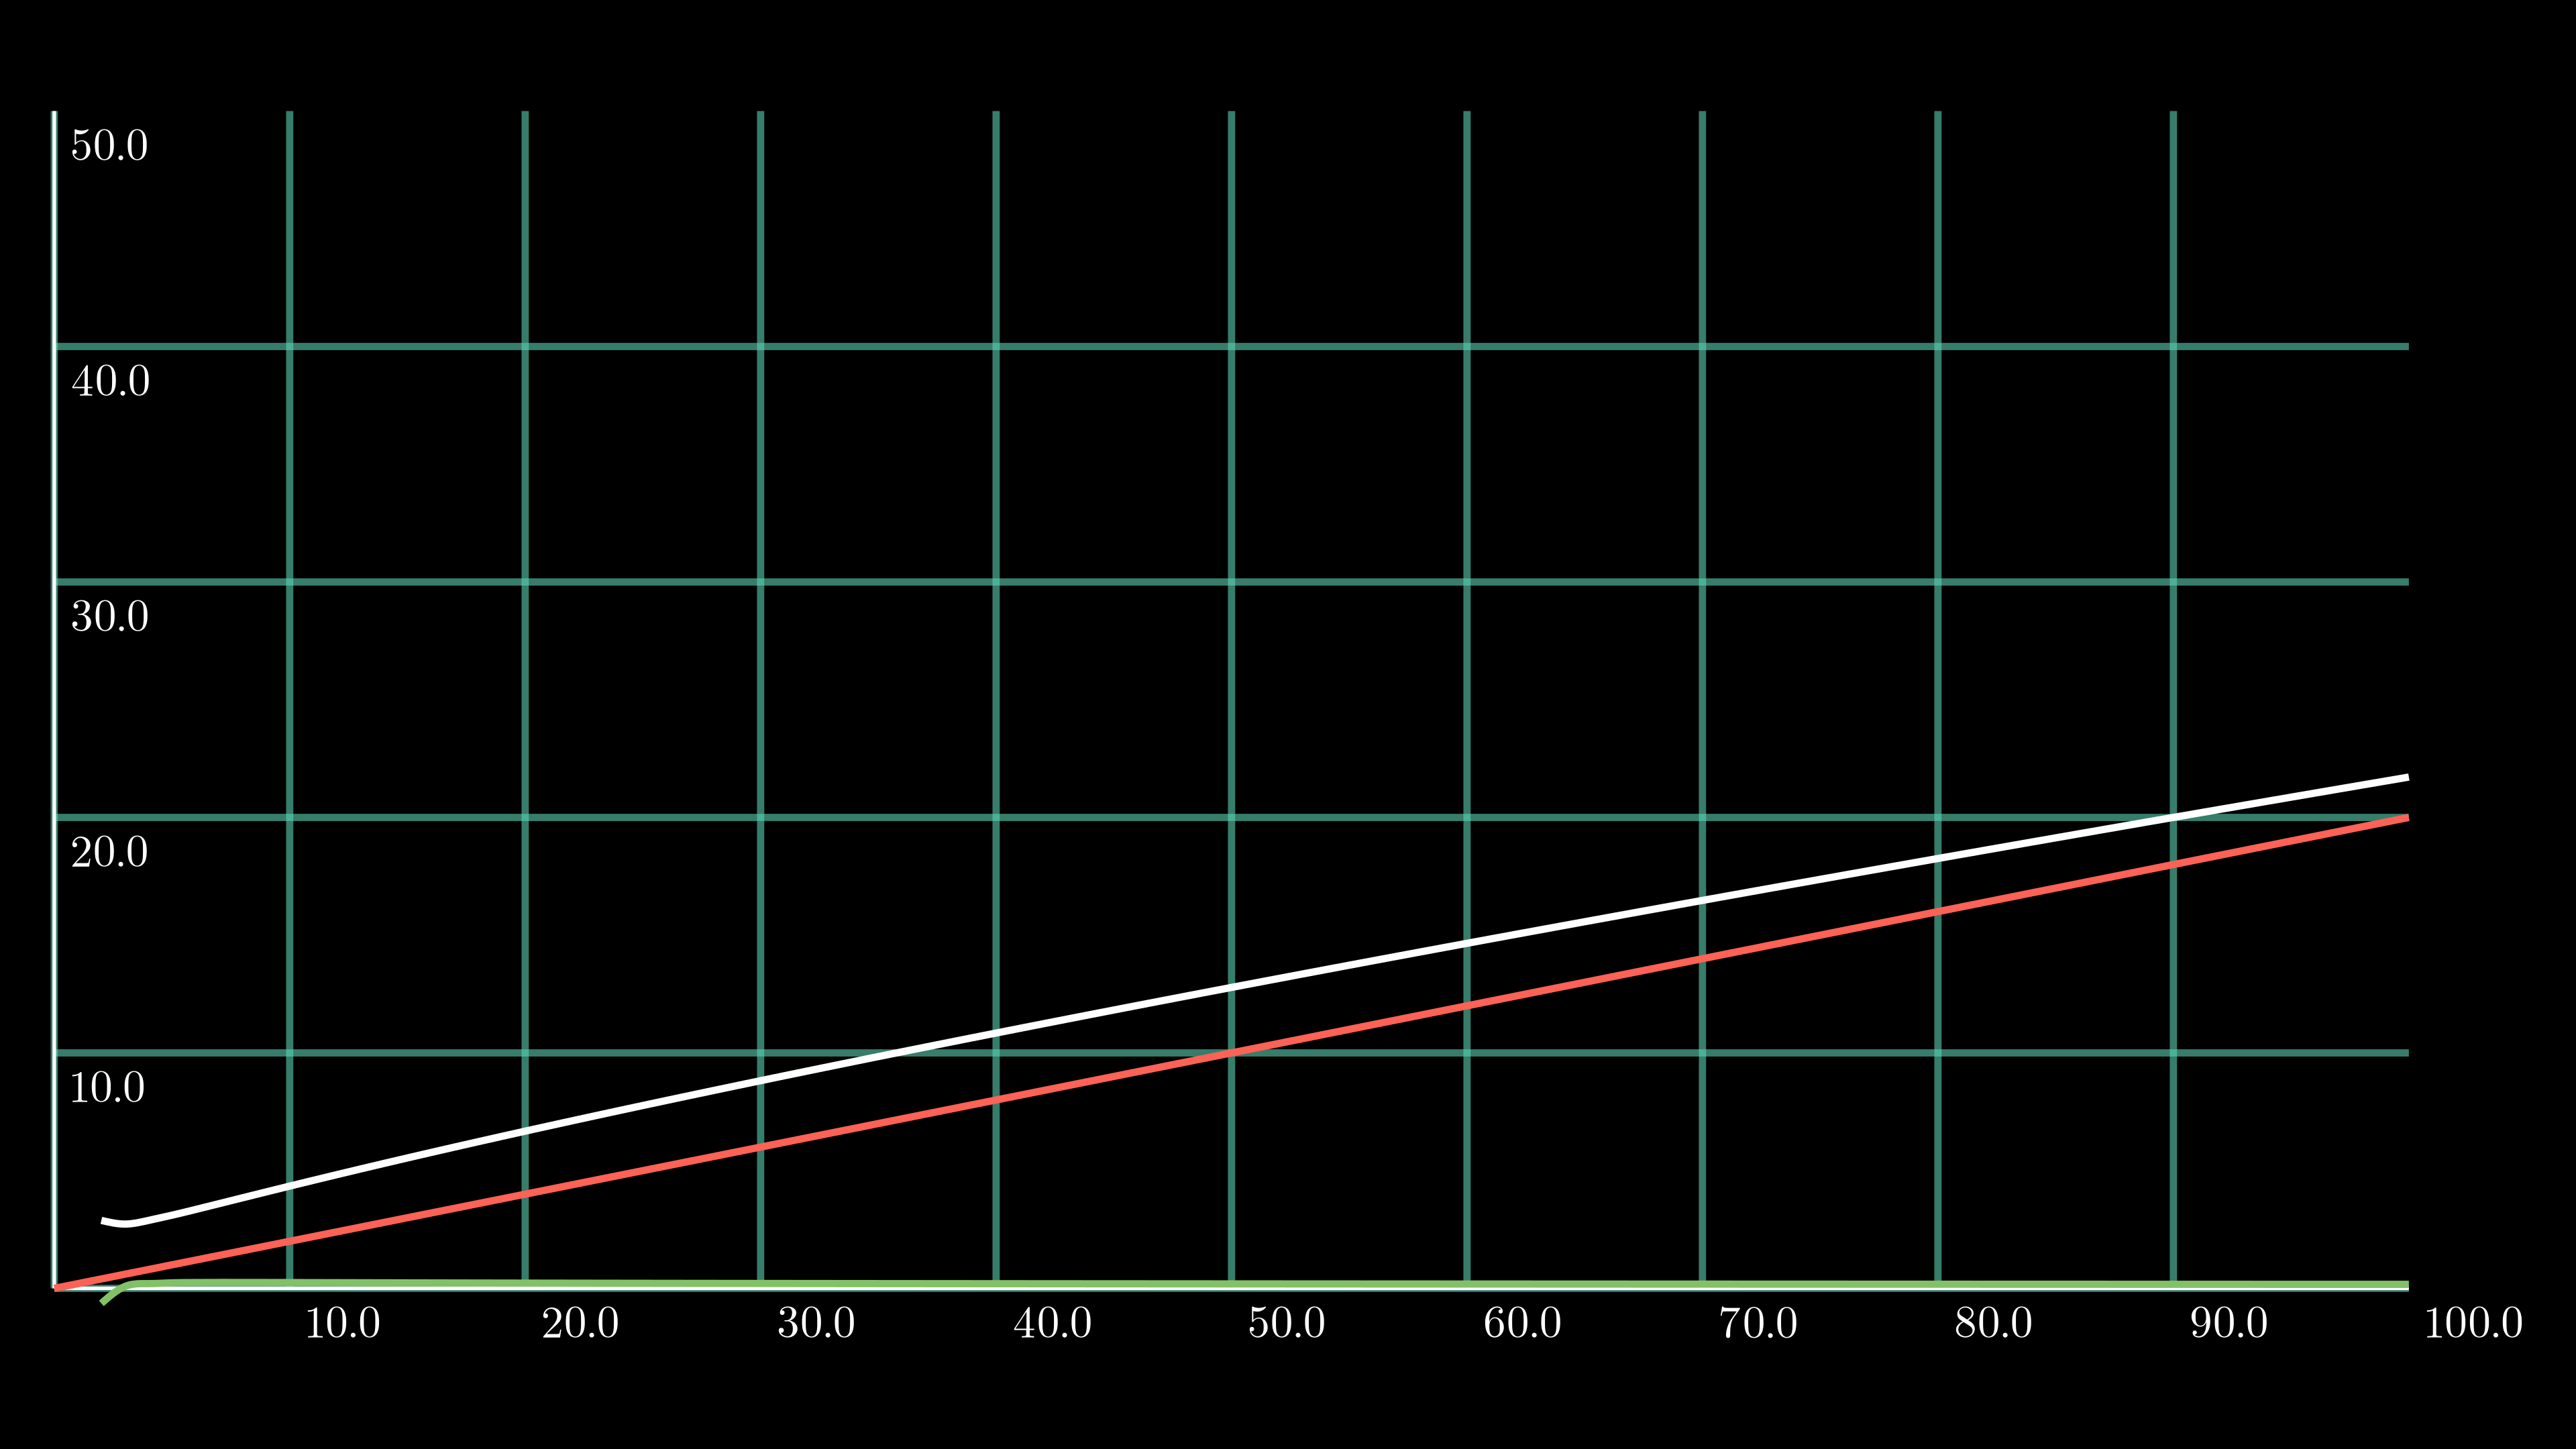

In [5]:
%%manim -v WARNING -qk PositivePlane

class PositivePlane(Scene):
    def construct(self):
        plane = NumberPlane(
            x_range = (0, max_x, axis_step),
            y_range = (0, max_y, axis_step),
            x_length = 13,
            y_length = 6.5,
            background_line_style = {
                "stroke_color": TEAL,
                "stroke_width": 4,
                "stroke_opacity": 0.6,
            },
            axis_config = {"include_numbers": True},
        ).center()

        f1 = plane.get_graph(primeCount, (2, max_x))

        f2 = plane.get_derivative_graph(f1, x_range = (2, max_x))

        f3 = plane.get_graph(lambda x: 0.2 * x, color = RED)

        self.add(plane, f1, f2, f3)

In [8]:
%%manim -v WARNING -ql BookSort

class BookSort(Scene):
    def construct(self):
        size = 6
        begin = -3
        cur_level = 0.5
        nex_level = 1

        tot = Line((begin, 0, 0), (begin + size, 0, 0))

        cur = Line((begin, cur_level, 0), (begin + 1, cur_level, 0)).set_color(BLUE)

        next = Line((begin + 1, nex_level, 0), (begin + 2, nex_level, 0)).set_color(RED)

        self.add(tot, cur, next)

        for pos in range(size):
            for width in range(1, size - pos + 1):
                for nex in range(pos + 1, size - width + 1):
                    # cur.put_start_and_end_on((begin + pos, cur_level, 0), (begin + pos + width, cur_level, 0))
                    # next.put_start_and_end_on((begin + nex, nex_level, 0), (begin + nex + width, nex_level, 0))
                    self.play(ApplyMethod(cur.put_start_and_end_on, (begin + pos, cur_level, 0), (begin + pos + width, cur_level, 0)))
                    self.play(ApplyMethod(next.put_start_and_end_on, (begin + nex, nex_level, 0), (begin + nex + width, nex_level, 0)))
                    # self.wait()

In [ ]:
%%manim -v WARING -ql 